In [2]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates

from datetime import datetime

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [10]:
#Read xls File and Load to a dataframe

df = pd.read_excel('Hclean_weather2015_2020.xlsx')
df = df.drop(columns = df.columns[14:])
df

,Unnamed: 0.1,Unnamed: 0,Station,Timestamp,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s)
0,4681,4681,Hemlock,2015-04-08 12:30:00,2015-04-08,12:30:00,1023.15,4.792,72.8,0.3,0.0,0.00,242.9,0.74
1,4682,4682,Hemlock,2015-04-08 13:00:00,2015-04-08,13:00:00,1023.05,4.454,76.2,0.6,0.0,0.00,5.6,0.56
2,4683,4683,Hemlock,2015-04-08 13:30:00,2015-04-08,13:30:00,1022.65,3.985,80.6,1.0,0.0,0.19,33.7,0.74
3,4684,4684,Hemlock,2015-04-08 14:00:00,2015-04-08,14:00:00,1022.65,3.827,87.6,2.0,0.0,0.00,51.9,0.74
4,4685,4685,Hemlock,2015-04-08 14:30:00,2015-04-08,14:30:00,1022.35,3.591,89.7,2.1,0.0,0.00,22.5,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83237,96977,9329,Hemlock,2020-07-13 08:30:00,2020-07-13,08:30:00,1001.95,23.088,87.8,21.0,0.0,0.00,95.5,0.00
83238,96978,9330,Hemlock,2020-07-13 09:00:00,2020-07-13,09:00:00,1001.85,23.545,83.8,20.7,0.0,0.00,95.5,0.56
83239,96979,9331,Hemlock,2020-07-13 09:30:00,2020-07-13,09:30:00,1001.75,24.436,82.3,21.2,0.0,0.00,95.5,0.37
83240,96980,9332,Hemlock,2020-07-13 10:00:00,2020-07-13,10:00:00,1001.85,25.137,79.2,21.3,0.0,0.00,96.9,0.56


In [4]:
#cooerce time stamps to str
df['Time'] = df['Time'].astype(str)

#df['Barometric Pressure (mbar)'] = df['Barometric Pressure (mbar)'].astype(str)

In [5]:
#Separate years
#df2014 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2015 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2016 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2016-03-01", "2016-04-30")])]
df2017 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2017-03-01", "2017-04-30")])]
df2018 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2018-03-01", "2018-04-30")])]
df2019 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2019-03-01", "2019-04-30")])]
df2020 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2020-03-01", "2020-04-30")])]
df2016

,Unnamed: 0.1,Unnamed: 0,Station,Timestamp,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),...,Wind Direction (ø),Gust Speed (m/s),Solar Radiation (W/m²),PAR (uE),Soil Temp at 5 cm (°C),Soil Temp at 20 cm (°C),Soil Temp at 50_60 cm (°C),Soil Water Content at 5 cm (m³/m³),Soil Water Content at 20 cm (m³/m³),Soil Water Content at 50_60 cm (m³/m³)
12847,20400,2880,Hemlock,2016-03-01 00:00:00,2016-03-01,00:00:00,1002.95,4.454,78.1,1.0,...,220.4,2.04,0.6,1.2,4.921,4.792,5.076,0.4521,0.4107,0.3518
12848,20401,2881,Hemlock,2016-03-01 00:30:00,2016-03-01,00:30:00,1003.35,4.973,73.8,0.7,...,196.5,1.11,0.6,1.2,4.921,4.766,5.076,0.4521,0.4107,0.3518
12849,20402,2882,Hemlock,2016-03-01 01:00:00,2016-03-01,01:00:00,1004.25,5.128,68.7,-0.1,...,185.3,1.11,0.6,1.2,4.921,4.766,5.076,0.4521,0.4114,0.3518
12850,20403,2883,Hemlock,2016-03-01 01:30:00,2016-03-01,01:30:00,1006.35,5.719,62.8,-0.8,...,297.6,6.68,0.6,1.2,4.947,4.766,5.076,0.4528,0.4114,0.3518
12851,20404,2884,Hemlock,2016-03-01 02:00:00,2016-03-01,02:00:00,1007.85,3.906,62.2,-2.7,...,275.2,7.24,0.6,1.2,4.947,4.766,5.076,0.4528,0.4121,0.3511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15439,23323,5803,Hemlock,2016-04-30 21:30:00,2016-04-30,21:30:00,1017.55,9.879,60.4,2.6,...,85.6,0.93,0.6,1.2,9.583,8.095,8.693,0.4542,0.3417,0.2284
15440,23324,5804,Hemlock,2016-04-30 22:00:00,2016-04-30,22:00:00,1017.75,9.632,61.0,2.5,...,64.6,1.11,0.6,1.2,9.485,8.095,8.717,0.4542,0.3417,0.2276
15441,23325,5805,Hemlock,2016-04-30 22:30:00,2016-04-30,22:30:00,1017.85,9.064,60.9,1.9,...,162.9,0.74,0.6,1.2,9.410,8.095,8.717,0.4542,0.3417,0.2276
15442,23326,5806,Hemlock,2016-04-30 23:00:00,2016-04-30,23:00:00,1018.05,8.891,61.7,1.9,...,158.6,0.74,0.6,1.2,9.312,8.095,8.742,0.4542,0.3417,0.2284


### Case 1 - 'Data'

0.12192301678020234
43.654760998891746


,Unnamed: 0.1,Unnamed: 0,Station,Timestamp,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),...,Wind Direction (ø),Gust Speed (m/s),Solar Radiation (W/m²),PAR (uE),Soil Temp at 5 cm (°C),Soil Temp at 20 cm (°C),Soil Temp at 50_60 cm (°C),Soil Water Content at 5 cm (m³/m³),Soil Water Content at 20 cm (m³/m³),Soil Water Content at 50_60 cm (m³/m³)
47,4728,4728,Hemlock,2015-04-09 12:00:00,2015-04-09,12:00:00,1021.95,1.859,96.0,1.3,...,51.9,0.56,20.6,38.7,3.195,4.506,4.740,0.4542,0.4332,0.3540
95,4776,4776,Hemlock,2015-04-10 12:00:00,2015-04-10,12:00:00,1005.05,5.488,100.0,5.5,...,273.8,0.56,30.6,48.7,4.168,4.376,4.558,0.4528,0.4346,0.3504
143,4824,4824,Hemlock,2015-04-11 12:00:00,2015-04-11,12:00:00,1007.15,9.509,52.2,0.2,...,293.4,5.75,520.6,508.7,5.411,4.973,4.714,0.4579,0.4281,0.3453
191,4872,4872,Hemlock,2015-04-12 12:00:00,2015-04-12,12:00:00,1018.05,16.034,37.4,1.5,...,266.7,2.60,323.1,333.7,5.411,4.921,4.869,0.4586,0.4259,0.3431
239,4920,4920,Hemlock,2015-04-13 12:00:00,2015-04-13,12:00:00,1018.55,18.652,39.7,4.7,...,271.0,2.04,373.1,358.7,6.661,5.514,5.128,0.4579,0.4230,0.3388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49462,58152,5544,Hemlock,2018-04-26 12:00:00,2018-04-26,12:00:00,998.25,15.891,61.5,8.5,...,290.6,3.90,85.6,371.2,9.114,7.670,6.813,0.4506,0.4121,0.3678
49510,58200,5592,Hemlock,2018-04-27 12:00:00,2018-04-27,12:00:00,1004.05,12.847,72.1,8.0,...,300.4,0.93,13.1,36.2,8.369,7.645,7.041,0.4550,0.3932,0.3220
49558,58248,5640,Hemlock,2018-04-28 12:00:00,2018-04-28,12:00:00,1002.75,18.057,68.6,12.2,...,268.1,2.04,84.4,381.2,9.064,7.670,7.091,0.4550,0.3961,0.3235
49606,58296,5688,Hemlock,2018-04-29 12:00:00,2018-04-29,12:00:00,1005.55,7.066,96.4,6.5,...,300.4,1.86,56.9,83.7,8.742,8.170,7.393,0.4484,0.4114,0.3344


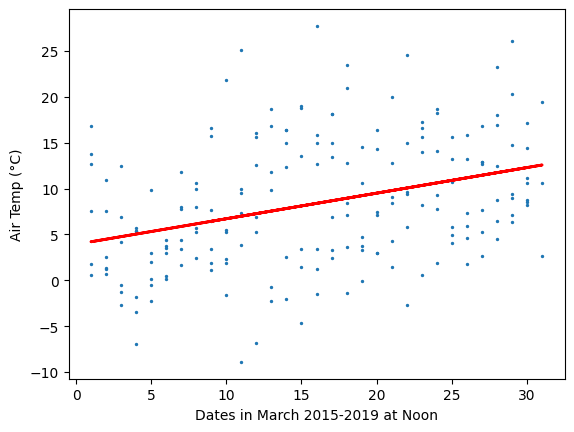

In [6]:
#Separate specific time
#df2015_2019 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-0-01", "2019-12-31")])]
df2015_2019 = pd.concat([df2015,df2016,df2017,df2018])
df15_19_noon = df2015_2019[df2015_2019["Time"]== '12:00:00']

#change dates to remove year
#print(df15_19_noon)

#Plot dates by temps for 2015
date15_19_noon = df15_19_noon['Date']
temp15_19_noon = df15_19_noon['Air Temp (°C)']

#print(date15_19_noon)
date15_19_noon = date15_19_noon.astype(str)
date15_19_noon = date15_19_noon.str.split("-").str[-1].astype(int)

date15_19_noon = date15_19_noon.to_numpy().reshape(-1,1)
temp15_19_noon = temp15_19_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(date15_19_noon,temp15_19_noon)
temp15_19_noon_pred = model.predict(date15_19_noon)

MSE= mean_squared_error(temp15_19_noon, temp15_19_noon_pred)
R2= r2_score(temp15_19_noon, temp15_19_noon_pred)

print (R2)
print (MSE)

#draw scatter plot
plt.scatter(date15_19_noon,temp15_19_noon, s=2)
plt.plot(date15_19_noon, temp15_19_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in March 2015-2019 at Noon")
plt.ylabel("Air Temp (°C)")
df15_19_noon

0.2619588939788361
35.963131268546725


,Unnamed: 0.1,Unnamed: 0,Station,Timestamp,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),...,Wind Direction (ø),Gust Speed (m/s),Solar Radiation (W/m²),PAR (uE),Soil Temp at 5 cm (°C),Soil Temp at 20 cm (°C),Soil Temp at 50_60 cm (°C),Soil Water Content at 5 cm (m³/m³),Soil Water Content at 20 cm (m³/m³),Soil Water Content at 50_60 cm (m³/m³)
63817,72984,2856,Hemlock,2019-03-01 12:00:00,2019-03-01,12:00:00,1021.35,-1.670,67.8,-6.8,...,15.4,1.48,46.9,116.2,1.751,3.380,4.376,0.6271,0.4049,0.3351
63865,73032,2904,Hemlock,2019-03-02 12:00:00,2019-03-02,12:00:00,1010.45,1.180,81.1,-1.7,...,19.7,0.00,54.4,86.2,2.262,3.512,4.376,0.6315,0.4019,0.3351
63913,73080,2952,Hemlock,2019-03-03 12:00:00,2019-03-03,12:00:00,1013.45,3.380,56.2,-4.5,...,251.3,2.23,63.1,103.7,2.610,3.696,4.402,0.6293,0.3932,0.3337
63961,73128,3000,Hemlock,2019-03-04 12:00:00,2019-03-04,12:00:00,999.65,1.561,82.0,-1.2,...,306.1,2.41,71.9,91.2,2.690,3.827,4.454,0.6315,0.3903,0.3358
64009,73176,3048,Hemlock,2019-03-05 12:00:00,2019-03-05,12:00:00,1009.45,-4.227,49.0,-13.3,...,272.4,1.86,69.4,118.7,2.074,3.801,4.506,0.6206,0.3918,0.3315
64057,73224,3096,Hemlock,2019-03-06 12:00:00,2019-03-06,12:00:00,1011.15,-5.979,44.9,-16.0,...,280.8,4.64,75.6,111.2,1.670,3.617,4.480,0.6148,0.3954,0.3293
64105,73272,3144,Hemlock,2019-03-07 12:00:00,2019-03-07,12:00:00,1016.75,-5.110,44.5,-15.3,...,269.6,3.53,21.9,91.2,1.153,3.301,4.376,0.6119,0.4078,0.3315
64153,73320,3192,Hemlock,2019-03-08 12:00:00,2019-03-08,12:00:00,1021.05,-1.299,49.6,-10.5,...,256.9,1.86,78.1,106.2,1.044,3.089,4.220,0.6104,0.4107,0.3308
64165,73800,3672,Hemlock,2019-03-18 12:00:00,2019-03-18,12:00:00,1017.75,2.584,37.5,-10.5,...,283.6,3.53,44.4,1773.7,3.036,4.272,4.947,0.5763,0.3947,0.3271
64213,73848,3720,Hemlock,2019-03-19 12:00:00,2019-03-19,12:00:00,1022.35,4.740,40.3,-7.6,...,292.0,4.45,30.6,78.7,3.195,4.220,4.792,0.5770,0.3954,0.3279


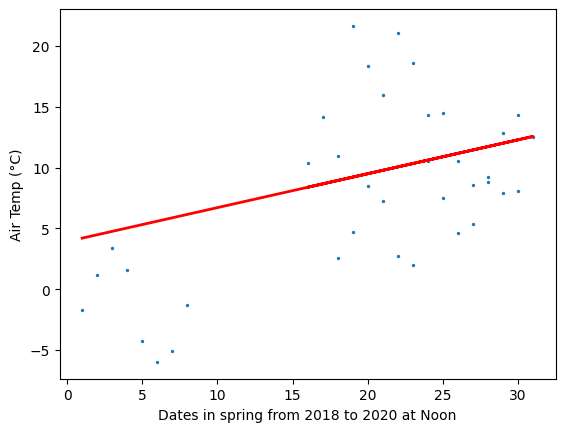

In [7]:
##Plot dates by temps for 2020
df18_20 =pd.concat([df2019])
df18_20_noon = df18_20[df18_20["Time"]== '12:00:00']
date18_20_noon = df18_20_noon['Date']
temp18_20_noon = df18_20_noon['Air Temp (°C)']

date18_20_noon = date18_20_noon.astype(str)
date18_20_noon = date18_20_noon.str.split("-").str[-1].astype(int)

# convert to 2-D array
date18_20_noon = date18_20_noon.to_numpy().reshape(-1,1)
temp18_20_noon = temp18_20_noon.to_numpy().reshape(-1,1)

# predict 2020 air temperature at noon
temp18_20_noon_pred = model.predict(date18_20_noon)

MSE= mean_squared_error(temp18_20_noon, temp18_20_noon_pred)
R2= r2_score(temp18_20_noon, temp18_20_noon_pred)

print (R2)
print (MSE)

# draw scatter plot
plt.scatter(date18_20_noon,temp18_20_noon, s=2)
plt.plot(date18_20_noon, temp18_20_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")


### Case 2 - 'Barometric Pressure (mbar)'

0.0013983167581743672
49.64680620047713


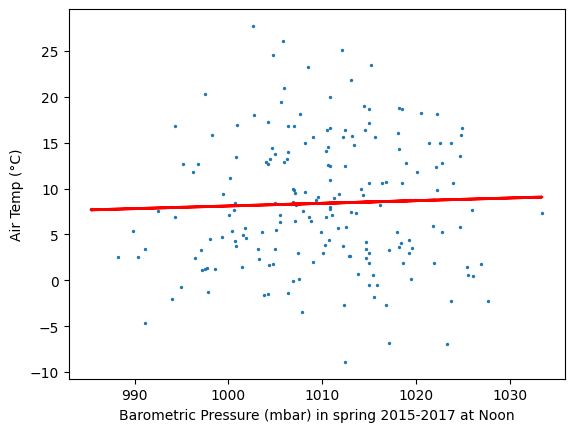

In [8]:
# plot linear regression
df2015_2017 = pd.concat([df2015,df2016,df2017,df2018])
df15_17_noon = df2015_2017[df2015_2017["Time"]== '12:00:00']

pressure15_17 = df15_17_noon[['Barometric Pressure (mbar)']]
temp15_17_noon = df15_17_noon['Air Temp (°C)']


# convert to 2-D array
pressure15_17 = pressure15_17.to_numpy().reshape(-1,1)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pressure15_17,temp15_17_noon)
temp15_17_noon_pred = model.predict(pressure15_17)

plt.scatter(pressure15_17,temp15_17_noon, s=2)
plt.plot(pressure15_17, temp15_17_noon_pred, color='red', linewidth=2)
plt.xlabel("Barometric Pressure (mbar) in spring 2015-2017 at Noon")
plt.ylabel("Air Temp (°C)")

MSE= mean_squared_error(temp15_17_noon, temp15_17_noon_pred)
R2= r2_score(temp15_17_noon, temp15_17_noon_pred)

print (R2)
print (MSE)

-0.02028646090794517
49.7163310089414


(array([ 980.,  990., 1000., 1010., 1020., 1030.]),
 [Text(980.0, 0, '980'),
  Text(990.0, 0, '990'),
  Text(1000.0, 0, '1000'),
  Text(1010.0, 0, '1010'),
  Text(1020.0, 0, '1020'),
  Text(1030.0, 0, '1030')])

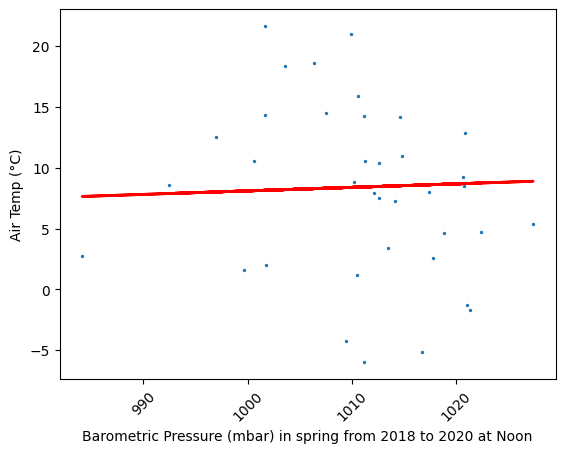

In [9]:
df20_19 =pd.concat([df2019])
df2020_noon = df20_19[df20_19["Time"]== '12:00:00']
pre2020_noon = df2020_noon['Barometric Pressure (mbar)']
temp2020_noon = df2020_noon['Air Temp (°C)']

pre2020_noon = pre2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(pre2020_noon, temp2020_noon, s = 2)
plt.plot(pre2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Barometric Pressure (mbar) in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 3 - Gust Speed and air temp


0.011618107786467546
48.60166255216088


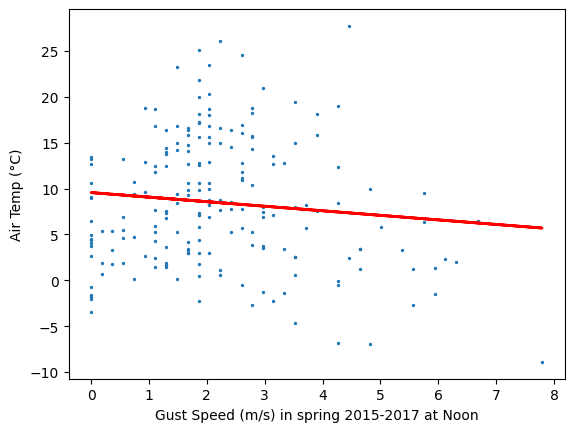

In [35]:
# plot linear regression
df2015_2017 = pd.concat([df2015,df2016,df2017,df2018])
df15_17_noon = df2015_2017[df2015_2017["Time"]== '12:00:00']

gSpeed15_19 = df15_17_noon[['Gust Speed (m/s)']]
temp15_17_noon = df15_17_noon['Air Temp (°C)']


# convert to 2-D array
gSpeed15_19 = gSpeed15_19.to_numpy().reshape(-1,1)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(gSpeed15_19,temp15_17_noon)
temp15_17_noon_pred = model.predict(gSpeed15_19)

plt.scatter(gSpeed15_19,temp15_17_noon, s=2)
plt.plot(gSpeed15_19, temp15_17_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring 2015-2017 at Noon")
plt.ylabel("Air Temp (°C)")

MSE= mean_squared_error(temp15_17_noon, temp15_17_noon_pred)
R2= r2_score(temp15_17_noon, temp15_17_noon_pred)

print (R2)
print (MSE)

0.04113835944962041
46.72323366023805


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10')])

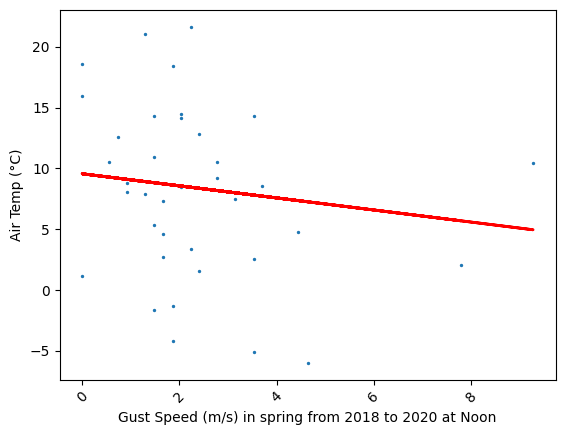

In [36]:
df20_19 =pd.concat([df2019])
df2020_noon = df20_19[df20_19["Time"]== '12:00:00']
pre2020_noon = df2020_noon['Gust Speed (m/s)']
temp2020_noon = df2020_noon['Air Temp (°C)']

pre2020_noon = pre2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(pre2020_noon, temp2020_noon, s = 2)
plt.plot(pre2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 4 - Barometric Pressure (mbar),Gust Speed (m/s) and Air Temp

In [37]:
# plot linear regression
df2015_2017 = pd.concat([df2015,df2016,df2017,df2018])
df15_17_noon = df2015_2017[df2015_2017["Time"]== '12:00:00']

pre15_17 = df15_17_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)']]
temp15_17_noon = df15_17_noon['Air Temp (°C)']

# convert to 2-D array
pre15_17 = pre15_17.to_numpy().reshape(-1,2)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_17,temp15_17_noon)
temp15_19_noon_pred = model.predict(pre15_17)


MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)



0.012382480019587083
48.564076107456685


In [38]:
##Plot dates by temps for 2020
df20_19 =pd.concat([df2019])
df2020_noon = df20_19[df20_19["Time"]== '12:00:00']
pre2020_noon = df2020_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)']]
temp2020_noon = df2020_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2020_noon = pre2020_noon.to_numpy().reshape(-1,2)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
# plt.scatter(pre2020_noon, temp2020_noon, s = 2)
# plt.xlabel("Barometric Pressure (mbar) in spring 2020 at Noon")
# plt.ylabel("Air Temp (°C)")
# plt.xticks(rotation=45)


0.027761024900643694
47.375081957688195


### Case 5 - Wind Speed (m/s)

0.0023826287840489346
49.05579838520197


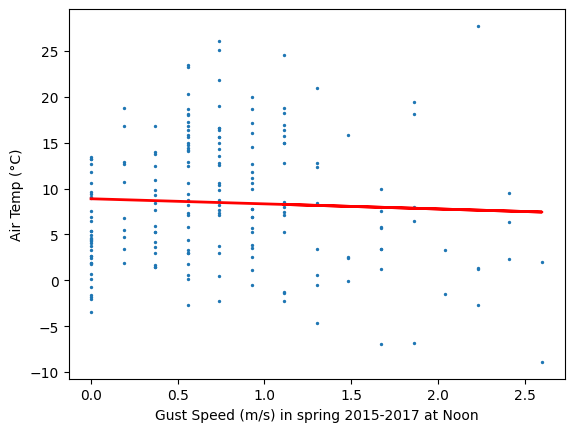

In [39]:
# plot linear regression
df2015_2017 = pd.concat([df2015,df2016,df2017,df2018])
df15_17_noon = df2015_2017[df2015_2017["Time"]== '12:00:00']

gSpeed15_19 = df15_17_noon[['Wind Speed (m/s)']]
temp15_17_noon = df15_17_noon['Air Temp (°C)']


# convert to 2-D array
gSpeed15_19 = gSpeed15_19.to_numpy().reshape(-1,1)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(gSpeed15_19,temp15_17_noon)
temp15_17_noon_pred = model.predict(gSpeed15_19)

plt.scatter(gSpeed15_19,temp15_17_noon, s=2)
plt.plot(gSpeed15_19, temp15_17_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring 2015-2017 at Noon")
plt.ylabel("Air Temp (°C)")

MSE= mean_squared_error(temp15_17_noon, temp15_17_noon_pred)
R2= r2_score(temp15_17_noon, temp15_17_noon_pred)

print (R2)
print (MSE)

0.007511242165452958
48.361809646327714


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7')])

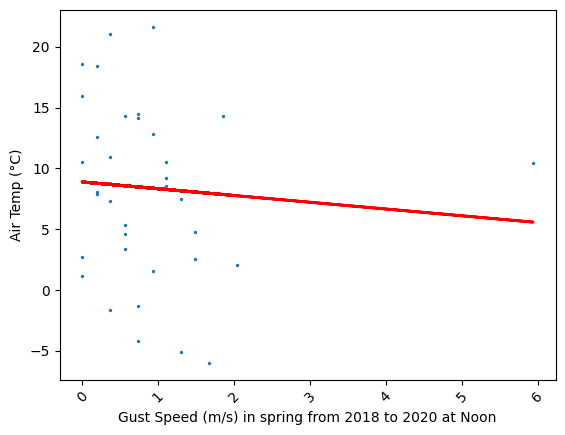

In [40]:
df20_19 =pd.concat([df2019])
df2020_noon = df20_19[df20_19["Time"]== '12:00:00']
pre2020_noon = df2020_noon['Wind Speed (m/s)']
temp2020_noon = df2020_noon['Air Temp (°C)']

pre2020_noon = pre2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(pre2020_noon, temp2020_noon, s = 2)
plt.plot(pre2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 7 - 'Wind Speed (m/s)','Barometric Pressure (mbar)'

In [41]:
# plot linear regression
df2015_2017 = pd.concat([df2015,df2016,df2017,df2018])
df15_17_noon = df2015_2017[df2015_2017["Time"]== '12:00:00']

pre15_17 = df15_17_noon[['Barometric Pressure (mbar)','Wind Speed (m/s)']]
temp15_17_noon = df15_17_noon['Air Temp (°C)']

# convert to 2-D array
pre15_17 = pre15_17.to_numpy().reshape(-1,2)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_17,temp15_17_noon)
temp15_19_noon_pred = model.predict(pre15_17)


MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


0.0034389427962732144
49.00385629927781


In [42]:
##Plot dates by temps for 2020
df20_19 =pd.concat([df2019])
df2020_noon = df20_19[df20_19["Time"]== '12:00:00']
pre2020_noon = df2020_noon[['Barometric Pressure (mbar)','Wind Speed (m/s)']]
temp2020_noon = df2020_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2020_noon = pre2020_noon.to_numpy().reshape(-1,2)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)

-0.007500334258242258
49.09329098126801


### Case 8
##### x: 'Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)'\n
##### y: 'Air Temp (°C)'

In [43]:
# plot linear regression
df2015_2017 = pd.concat([df2015,df2016,df2017,df2018])
df15_17_noon = df2015_2017[df2015_2017["Time"]== '12:00:00']

pre15_17 = df15_17_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)']]
temp15_17_noon = df15_17_noon['Air Temp (°C)']

# convert to 2-D array
pre15_17 = pre15_17.to_numpy().reshape(-1,3)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_17,temp15_17_noon)
temp15_19_noon_pred = model.predict(pre15_17)


MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


0.038668192043614824
47.271529860100834


In [44]:
##Plot dates by temps for 2020
df20_19 =pd.concat([df2019])
df2020_noon = df20_19[df20_19["Time"]== '12:00:00']
pre2020_noon = df2020_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)']]
temp2020_noon = df2020_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2020_noon = pre2020_noon.to_numpy().reshape(-1,3)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)

0.009054744897314615
48.286598129101314


### Case 6
##### x: 'RH (%)'
##### y: 'Air Temp (°C)'

In [45]:
# plot linear regression
df2015_2017 = pd.concat([df2015,df2016,df2017,df2018])
df15_17_noon = df2015_2017[df2015_2017["Time"]== '12:00:00']

pre15_17 = df15_17_noon['RH (%)']
temp15_17_noon = df15_17_noon['Air Temp (°C)']

# convert to 2-D array
pre15_17 = pre15_17.to_numpy().reshape(-1,1)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_17,temp15_17_noon)
temp15_19_noon_pred = model.predict(pre15_17)


MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


0.0472934926823545
46.847398302898654


-0.1494478588950896
56.01008385379647


(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 [Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90'),
  Text(100.0, 0, '100'),
  Text(110.0, 0, '110')])

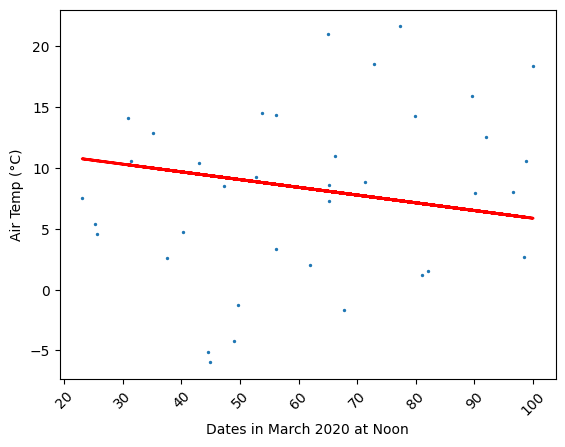

In [46]:
##Plot dates by temps for 2020
df20_19 =pd.concat([df2019])
df2020_noon = df20_19[df20_19["Time"]== '12:00:00']
pre2020_noon = df2020_noon['RH (%)']
temp2020_noon = df2020_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2020_noon = pre2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)

plt.scatter(pre2020_noon, temp2020_noon, s = 2)
plt.plot(pre2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xlabel("Dates in March 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 7 -Dew Point (°C)

0.4545850954145936
26.819664901198006


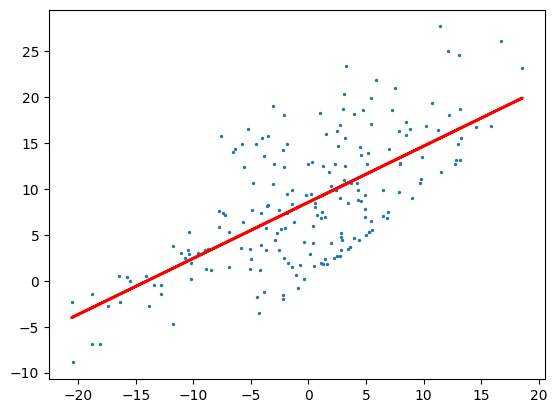

In [47]:
# plot linear regression
df2015_2017 = pd.concat([df2015,df2016,df2017,df2018])
df15_17_noon = df2015_2017[df2015_2017["Time"]== '12:00:00']

dp15_17 = df15_17_noon['Dew Point (°C)']
temp15_17_noon = df15_17_noon['Air Temp (°C)']

# convert to 2-D array
dp15_17 = dp15_17.to_numpy().reshape(-1,1)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(dp15_17,temp15_17_noon)
temp15_19_noon_pred = model.predict(dp15_17)


MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)

plt.scatter(dp15_17, temp15_17_noon, s = 2)
plt.plot(dp15_17, temp15_19_noon_pred, color='red', linewidth=2)

0.6686238454423765
16.147236310277147


(array([-20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.]),
 [Text(-20.0, 0, '−20'),
  Text(-15.0, 0, '−15'),
  Text(-10.0, 0, '−10'),
  Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25')])

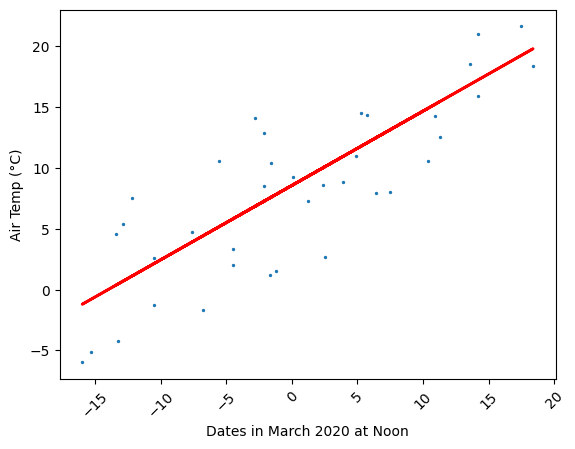

In [48]:
##Plot dates by temps for 2020
df20_19 =pd.concat([df2019])
df2020_noon = df20_19[df20_19["Time"]== '12:00:00']
dp2020_noon = df2020_noon['Dew Point (°C)']
temp2020_noon = df2020_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
dp2020_noon = dp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(dp2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)

plt.scatter(dp2020_noon, temp2020_noon, s = 2)
plt.plot(dp2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xlabel("Dates in March 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)